In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
import os

In [56]:
#  ==== OBTENCION DE DATOS

# Obtén la ruta absoluta del arhivo actual
current_dir = os.getcwd() 

path_datasets = os.path.join(current_dir,"datasets")


path_alojamiento = os.path.join(path_datasets,"AlojamientosAirBnb.csv") 

#Construimos el dataframe
df = pd.read_csv(path_alojamiento)

df

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5
...,...,...,...,...,...,...,...,...,...,...,...
5391,5392,12,Private room,0,0.0,1,1,1,7,1155.622409,1
5392,5393,45,Entire home/apt,0,0.0,3,2,1,1,383.097032,1
5393,5394,70,Entire home/apt,0,0.0,3,1,1,7,470.436150,32
5394,5395,90,Entire home/apt,0,0.0,4,1,1,3,1911.506302,6


## Estimación por Mínimos Cuadrados Ordinarios (MCO)

Dada una muestra aleatoria de tamaño $n$ de la población $\{y_i: i=1,...,n \}$ podemos escribir cada observación de la muestra como
$$y_i=\mu_y+u_i$$

Nos interesa estimar el parámetro poblacional $\mu_y$ usando la muestra. si estimamos el parámetro, nos quedará un residuo estimado por observación. El residuo $\hat{u}_i$ es un estimador del término del error $u_i$ y es la diferencia entre la media estimada y la i-ésima observación muestral.

$$y_i=\hat{\mu}_y+\hat{u}_i$$

El método de estimación **Mínimos Cuadrados Ordinarios** selecciona un valor del estimador del parámetro de tal forma que la sumatoria de los residuos estimados al cuadrado sea mínima. Es decir, elije el valor del parámetro que minimiza la siguiente expresión:

$$\sum_{i=1}^n(\hat{u}_i)^2=\sum_{i=1}^n(y_i-\hat{\mu}_y)^2$$

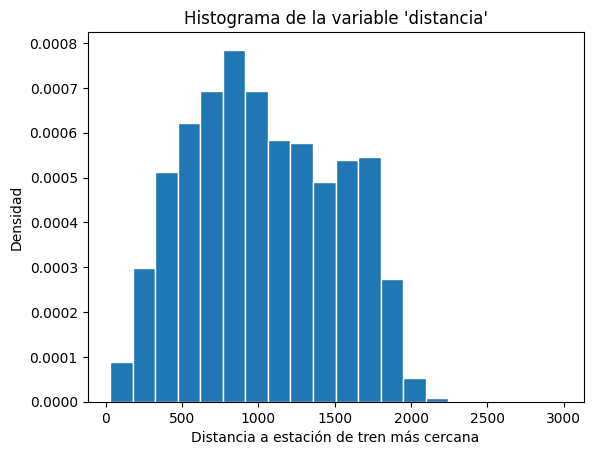

In [3]:
plt.hist(df['distancia'], bins=20, edgecolor="white", density=True)
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma de la variable 'distancia'")
plt.show()

En base a nuestra observacion vemos que hay mucha concentracion de datos entre 500-1000-1500.
Entonces vamos a calcular el MCO en esos rangos.

In [4]:
#definimos las posibles medias
posibles_medias = np.arange(500,1500,0.1)

#Df que contendra los datos
df_estimacion = pd.DataFrame(columns=['sum_u2','media','error_standar'])

#Hacemos una iteraccion donde calculamos el MCO para cada media posible.
for media in posibles_medias:

    #Calculo del MCO
    sum_u2 = sum((df['distancia'] - media) ** 2 )

    #Varianza muestral
    sigma_muestral = np.sqrt(sum((df['distancia'] - media) ** 2 ) / len(df['distancia'] - 1))

    #Calculo del error standar - POR MUESTRA
    error_standar = sigma_muestral / np.sqrt(len(df['distancia']))

    nueva_fila = {'sum_u2':sum_u2, 'media':media,'error_standar':error_standar}

    df_estimacion.loc[len(df_estimacion)] = nueva_fila

In [5]:
df_estimacion

,sum_u2,media,error_standar
0,2.741540e+09,500.0,9.703433
1,2.740965e+09,500.1,9.702414
2,2.740390e+09,500.2,9.701396
3,2.739815e+09,500.3,9.700378
4,2.739240e+09,500.4,9.699360
...,...,...,...
9995,2.380656e+09,1499.5,9.042247
9996,2.381159e+09,1499.6,9.043203
9997,2.381662e+09,1499.7,9.044158
9998,2.382166e+09,1499.8,9.045114


In [6]:
#MCO minimo
mu_minimo = df_estimacion[df_estimacion['sum_u2'] == min(df_estimacion['sum_u2'])]

#Esta forma de calcular el ee corresponde al manejo de una muestra.
ee_minimo = df_estimacion[df_estimacion['error_standar'] == min(df_estimacion['error_standar'])]

#Esta forma tiene en cuenta el ee que corresponde a la distribucion de las medias muestrales
ee_medias_muestral = np.std(df_estimacion['media'],ddof=1) / np.sqrt(len(df_estimacion))

#Mostramos la fila que tuvo el menor MCO.
print(mu_minimo)

#Esperanza de las medias - seria el promedio de los promedios.
print(np.mean(df_estimacion['media']))

#Mostramos aquella fila, cuya media, presento el menor error estandar.
print(ee_minimo)

#Mostramos el ee correspondiente a la distrubicion de las medias muestrales.
print(ee_medias_muestral)

            sum_u2   media  error_standar
5332  1.207407e+09  1033.2        6.43954
999.9500000001136
            sum_u2   media  error_standar
5332  1.207407e+09  1033.2        6.43954
2.886895679907824


Graficamos la distribucion de las medias y el MCO encontrado.

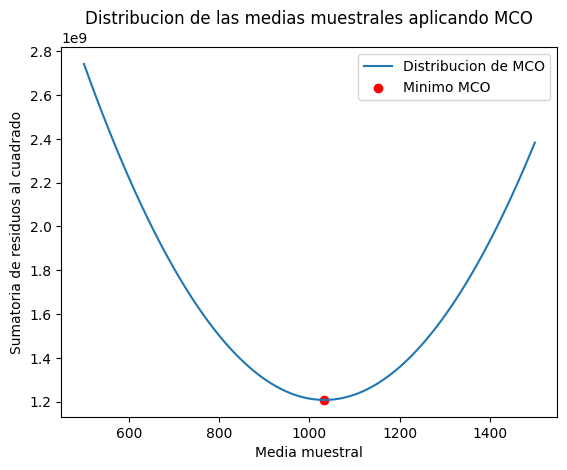

In [7]:
plt.title("Distribucion de las medias muestrales aplicando MCO")
plt.plot(df_estimacion['media'], df_estimacion['sum_u2'],label = "Distribucion de MCO") #Muestra como se distribuye el MCO para cada media muestral.
plt.scatter(mu_minimo['media'],mu_minimo['sum_u2'], color = "r", label = "Minimo MCO")#Mostramos aquel punto que presento el menor error muestral

plt.ylabel('Sumatoria de residuos al cuadrado')
plt.xlabel('Media muestral')
plt.legend()
#plt.ticklabel_format(style='plain')

plt.show()

<h3> Vamos a aplicar esto a una variable que presenta una distincion por categorias </h3>
Esto se aplicara a la variable precio,con la distincion del tipo de "Vivienda" a alquilar

In [8]:
tipos_de_viviendas = df['tipo'].unique()

#Tambien mostramos los minimos y maximos 
min = df['precio'].min()
max = df['precio'].max()

print(tipos_de_viviendas)
print(f"Precio maximo {max} -- Precio minimo {min}")

['Entire home/apt' 'Private room' 'Shared room']
Precio maximo 4000 -- Precio minimo 10


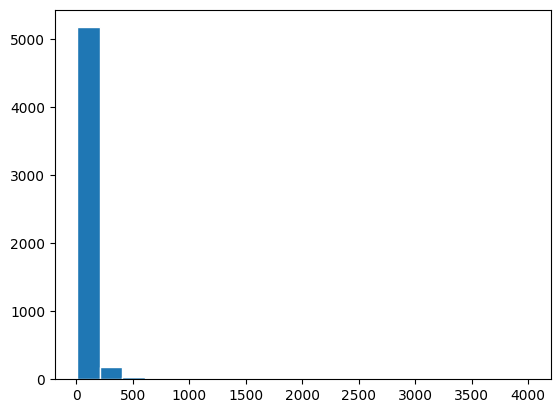

In [9]:
#Creamos un histograma de los precios para ver como se distribuyen totalmente
plt.hist(bins = 20,x = df['precio'],edgecolor="white", density=False)
plt.show()

In [10]:
#=== Buscamos el MCO por cada categoria

#Definicion de posibles medias
posibles_medias = np.arange(20,1000,1)

df_estimacion_tipo = pd.DataFrame(columns=['tipo','sum_u2','media'])
#     sum_u2 = sum((df['distancia'] - media) ** 2 )

for media in posibles_medias:
    for tipo in tipos_de_viviendas:
        
        #Calculo del MCO
        sum_u2 = sum((df['precio'][df['tipo'] == tipo] - media)  ** 2)

        #Creamos una fila para añadir al DF
        nueva_fila = {'tipo':tipo,'sum_u2':sum_u2,'media':media}
        df_estimacion_tipo.loc[len(df_estimacion_tipo)] = nueva_fila

df_estimacion_tipo



,tipo,sum_u2,media
0,Entire home/apt,39293548,20
1,Private room,20636657,20
2,Shared room,110849,20
3,Entire home/apt,38831292,21
4,Private room,20561752,21
...,...,...,...
2935,Private room,1435102409,998
2936,Shared room,123671369,998
2937,Entire home/apt,3137014020,999
2938,Private room,1438072996,999


Buscamos los datos minimos del MCO de cada tipo

In [11]:
index_min = df_estimacion_tipo.groupby('tipo')['sum_u2'].idxmin() # Buscamos los indices de los valores minimos

df_estimacion_tipo.loc[index_min] #Localizamos la fila del DF con los indices de los valores minimos

,tipo,sum_u2,media
189,Entire home/apt,24654868,83
76,Private room,19698232,45
23,Shared room,104822,27


In [12]:
#Comparativa con las medias reales
df.groupby('tipo')['precio'].mean()

tipo
Entire home/apt    82.832255
Private room       44.554271
Shared room        26.786260
Name: precio, dtype: float64

<h1> Aplicacion del metodo por maxima verosimilitud </h1>

Este método consiste en hallar los parámetros de la distribución que hagan más "creíbles" los datos observados. Aquellos parámetros que maximicen la densidad de los datos de mi muestra observada.

Dada una muestra aleatoria de tamaño $n$ de la población $\{y_i: i=1,...,n \}$ nos interesa la función de densidad de estas variables aleatorias para definir la función de verosimilitud. Por ejemplo, si la variable aleatoria es normal, la función de verosimilitud se define como:

$$L(y_1,...,y_n,\mu,\sigma)=\prod_{i=1}^nf(y_i,\mu,\sigma)$$

donde $f(y_i,\mu,\sigma)$ es la expresión para la función de densidad de una variable aleatoria normal. La verosimilitud consiste en el producto de las funciones de densidad porque estamos trabajando con una muestra aleatoria y asumimos que cada observación de mi muestra es independiente de las demás. Por lo tanto, su función de distribución conjunta constituye el producto de sus densidades (repaso de clases anteriores).

Trabajar con el logaritmo de la función de verosimilitud, es equivalente (y tiene ventajas matemáticas) a trabajar con la función original. Por lo tanto, **dada la muestra observada** buscaremos los parámetros que logren maximizar la siguiente función (donde el producto pasa a ser sumatoria por propiedad del logaritmo):

$$log(L(y_1,...y_n,\mu,\sigma))=\sum_{i=1}^nlog(f(y_i,\mu,\sigma))$$

<hr>
En este caso vamos a estudiar el metodo en una distribucion de bernoulli.
La variable a usar son los datos bbinarios de la cantidad de casas "Enteras" que hay en la distribucion.

In [13]:
df['aloj_completo'] = df['tipo'].apply(
    lambda x: 1 if x=='Entire home/apt' else 0
    )
df['aloj_completo'].value_counts()

aloj_completo
1    3708
0    1688
Name: count, dtype: int64

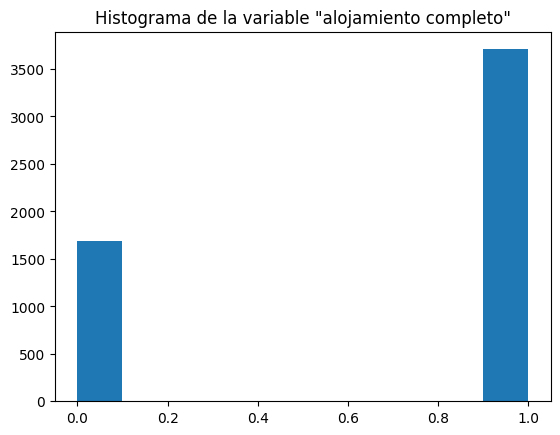

In [14]:
plt.hist(df['aloj_completo'])
plt.title('Histograma de la variable "alojamiento completo"')
plt.show()

In [44]:
#En este caso, en la distribucion Bernoulli, el parametro a estimar es p, que funciona como probabilidad de exito

posibles_p = np.arange(0,1,0.01)#Serian las probabilidad de que la V.A asuma el exito, osea 1.

df_mv = pd.DataFrame(columns=['logvrs','p'])

for p in posibles_p:
    
    logvrs = sum(stats.binom.logpmf(k = df['aloj_completo'],n = 1,p = p))

    nueva_fila = {'logvrs':logvrs,'p':p}

    df_mv.loc[len(df_mv)] = nueva_fila

df_mv


,logvrs,p
0,-inf,0.00
1,-1.709294e+04,0.01
2,-1.453988e+04,0.02
3,-1.305373e+04,0.03
4,-1.200450e+04,0.04
...,...,...
95,-5.246992e+03,0.95
96,-5.584830e+03,0.96
97,-6.032012e+03,0.97
98,-6.678406e+03,0.98


In [45]:
#Buscamos el valor que maximiso el metodo
maximo_mv = df_mv[df_mv['logvrs'] == df_mv['logvrs'].max()]
maximo_mv

,logvrs,p
69,-3352.861003,0.69


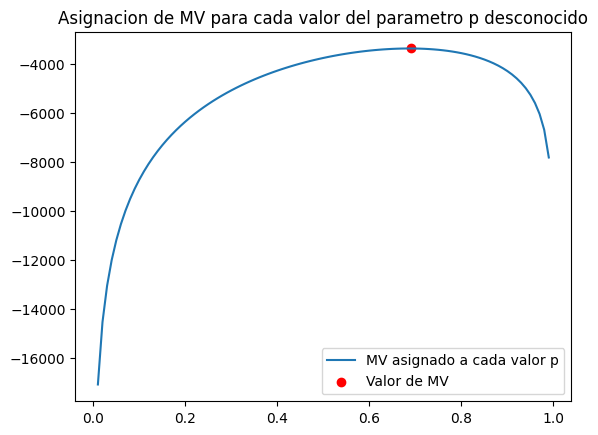

In [46]:
plt.title('Asignacion de MV para cada valor del parametro p desconocido')
plt.plot(df_mv['p'],df_mv['logvrs'],label='MV asignado a cada valor p')
plt.scatter(maximo_mv['p'],maximo_mv['logvrs'],label = "Valor de MV",color = "r")
plt.legend()
plt.show()

<h3> MV aplicado a la distancia </h3>

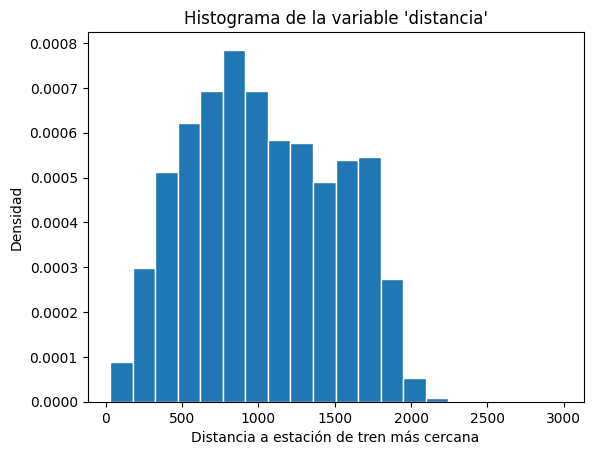

In [48]:
plt.hist(df['distancia'], bins=20, edgecolor="white", density=True)
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma de la variable 'distancia'")
plt.show()

En este caso vamos a hacer un analisis de la media y del desvio

In [50]:
#Mediante el grafico, determinamos de una forma visual posibles valores de mu y sigma
posibles_mu = np.arange(600, 1400, 1)
posibles_sigma = np.arange(300, 500, 1)

In [ ]:
resultados_mv = pd.DataFrame(columns=['logvrs','mu','sigma'])

for mu in posibles_mu:
    for sigma in posibles_sigma:
        
        #Funcion de la MV
        logvrs = sum(stats.norm.logpdf(x = df['distancia'],loc = mu, scale = sigma))

        nueva_fila = {'logvrs':logvrs,'mu':mu,'sigma':sigma}
        resultados_mv.loc[len(resultados_mv)] = nueva_fila

resultados_mv

In [57]:
# El bucle anterior demora bastante en correr, por eso guardamos el resultado en una tabla
# resultados_mv.to_csv('Bases/Resultados_mv_distancia.csv', index=False)

direccion_resultados = os.path.join(path_datasets,'Resultados_mv_distancia.csv')
resultados_mv = pd.read_csv(direccion_resultados)
resultados_mv

,logvrs,mu,sigma
0,-48069.890083,600,300
1,-48006.031558,600,301
2,-47942.924864,600,302
3,-47880.559699,600,303
4,-47818.925936,600,304
...,...,...,...
159995,-42375.569762,1399,495
159996,-42370.600039,1399,496
159997,-42365.704018,1399,497
159998,-42360.881022,1399,498


In [67]:
maximo_mv = resultados_mv[resultados_mv['logvrs']== resultados_mv['logvrs'].max()]
maximo_mv

,logvrs,mu,sigma
86773,-40891.440426,1033,473


rebicamos la coincidencia con los valores reales de mu y sigma de nuestra "poblacion"

In [61]:
print('Media muestral =', df['distancia'].mean())
print('Desvío estándar =',df['distancia'].std())

Media muestral = 1033.2067528033988
Desvío estándar = 473.0761708545229


para graficar el metodo de mv, vamos a filtrar los datos que vamos a usar


In [65]:
resultados_mv_filt = resultados_mv[(resultados_mv['mu']>1000) & (resultados_mv['mu']<1050)]
resultados_mv_filt = resultados_mv_filt[(resultados_mv_filt['sigma']>450) & (resultados_mv_filt['sigma']<500)]

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3705/1072739022.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')
/tmp/ipykernel_3705/1072739022.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$')


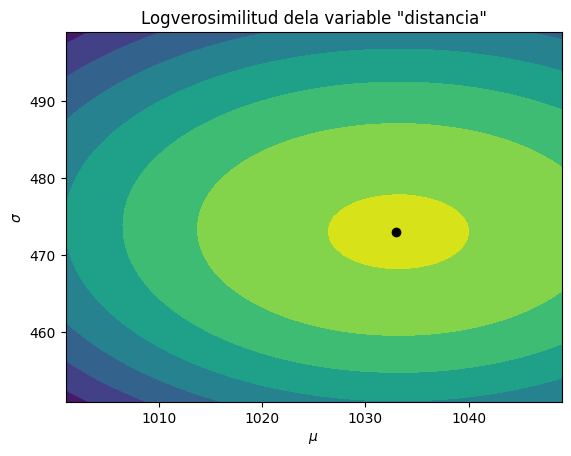

In [69]:
plt.tricontourf(resultados_mv_filt['mu'], resultados_mv_filt['sigma'], resultados_mv_filt['logvrs'])
plt.scatter(x = maximo_mv['mu'],y = maximo_mv['sigma'],color="black")
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Logverosimilitud dela variable "distancia"')
plt.show()

Como dijimos al principio, lo que busca el MV es "ajustar" mejor una distribucion a los datos,
para que estos sean mas "ciertos" y se pueda estudiar mejor su probabilidad. Graficamente vamos a ver como, en base a los parametros manejados, la funcion de densidad se ajusta mejor a los datos ahora.

In [70]:
#Tomamos los parametros que maximiaron la MV
mu_estimado = maximo_mv['mu']
sigma_estimado = maximo_mv['sigma']

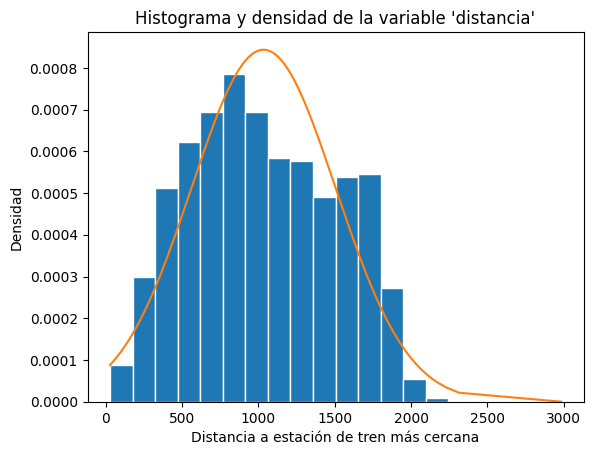

In [71]:
#GRaficamos la distribucion de los datos, usando como parametro los obtenidos por MV
plt.hist(df['distancia'], bins=20, edgecolor="white", density=True)
plt.plot(df['distancia'].sort_values(),
         stats.norm.pdf(df['distancia'].sort_values(), loc=mu_estimado, scale=sigma_estimado))
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma y densidad de la variable 'distancia'")
plt.show()

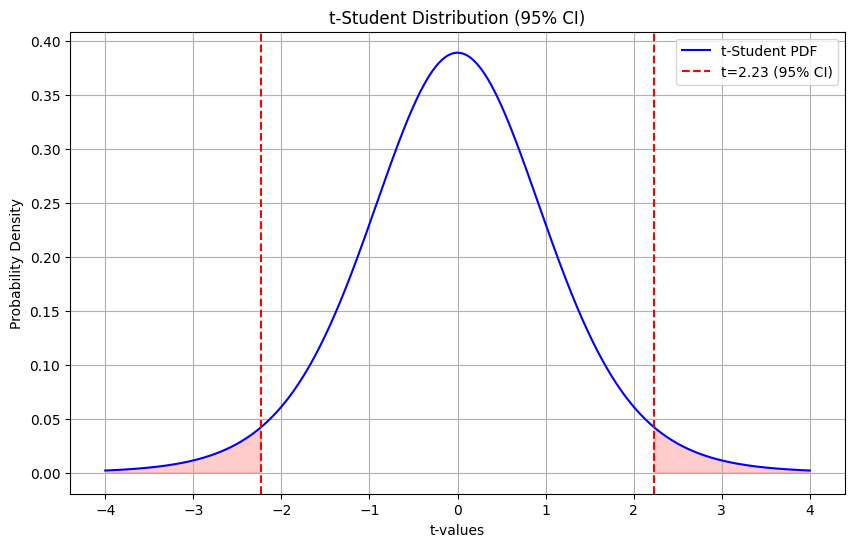

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Valores para la distribución t de Student
df = 10  # grados de libertad
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Valores críticos para 95% de confianza
t_critico = stats.t.ppf(0.90, df)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-Student PDF', color='blue')
plt.axvline(x=t_critico, color='red', linestyle='--', label=f't={t_critico:.2f} (95% CI)')
plt.axvline(x=-t_critico, color='red', linestyle='--')
plt.fill_between(x, 0, y, where=(x >= t_critico) | (x <= -t_critico), color='red', alpha=0.2)
plt.title('t-Student Distribution (95% CI)')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
